# Logistic map


Analyzing the one-dimensional map

$x_{k+1} = r x_k (1-x_k)$

as a model for chaotic dynamics

parts of the notebook are based on: C. Rossant, IPython Cookbook, 2nd ed. (2018), https://github.com/ipython-books/cookbook-2nd-code/blob/master/chapter12_deterministic/01_bifurcation.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
#define map

def log_map(x, r):
    return r* x* (1 - x)

#define iterated map
def it_map(x, r, n):
    for i in range(n):
        x = log_map(x, r)
    return x

## plot $x_{k+1}$ against $x_k$ and "cobweb" construction


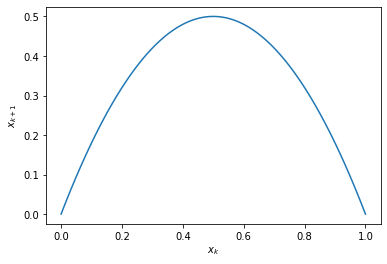

In [3]:
r = 2

x = np.linspace(0, 1, 100)
m = log_map(x, r)

plt.plot(x , m)
plt.xlabel("$x_k$")
plt.ylabel("$x_{k+1}$");

#### plot x as a function of "time" (i.e. the number of iterations) to see fixed points and cycles

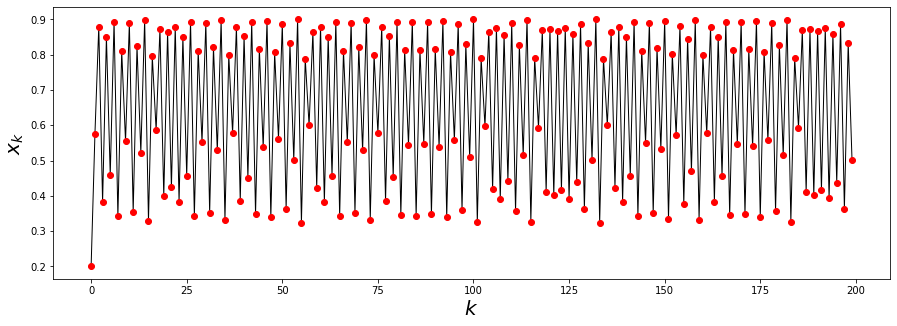

In [18]:
r=3.6
# try r<1, r= 2.5, 2.8, 3,3.1; r=3.5, 3.55, 3.6


nn=200

t=np.arange(nn)
x=np.ones(nn)
y=0.2

for i in range(nn):
    x[i]=y
    y = log_map(y, r)

plt.figure(figsize=(15,5))
plt.plot(t, x, 'k', lw=1)
plt.plot(t, x, 'ro', lw=2)
plt.xlabel("$k$", fontsize=20)
plt.ylabel("$x_k$", fontsize=20);

### cobweb construction

now the more interesting part, specify a starting value and try different r values to numerically see the fixed points, where they exist, where they are stable, and how they are approached

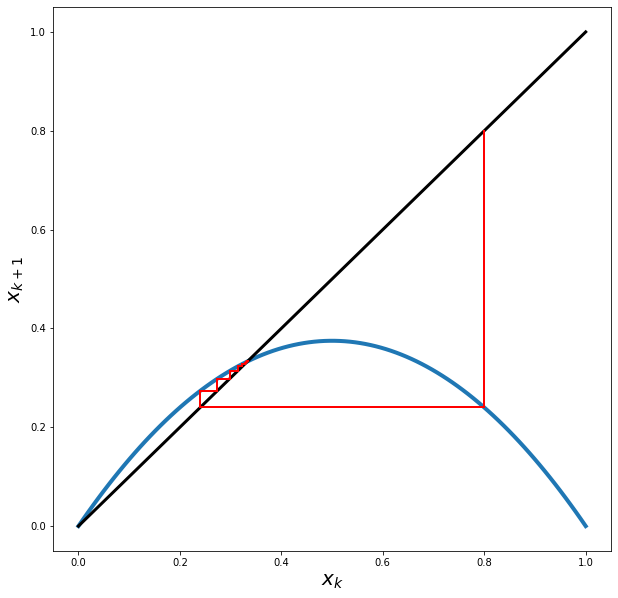

In [23]:
r=1.5
# try r<1, r= 2.5, 2.8, 3,3.1; r=3.5, 3.55, 3.6

n=100 # number of iterations in cobweb
x0=0.8 # starting value for cobweb

# plot logistic map and diagonal
t = np.linspace(0, 1,100)

plt.figure(figsize=(10,10))
plt.plot(t, log_map(t, r), lw=4)
plt.plot([0, 1], [0, 1], 'k', lw=3)

# plot cobweb construction
x= x0
for i in range(n):
    y = log_map(x, r)
    plt.plot([x, x], [x, y], 'r', lw=2)
    plt.plot([x, y], [y, y], 'r', lw=2)
    #plt.plot([x], [y], 'ok', ms=10, alpha=(i + 1) / n)
    x = y
plt.xlabel("$x_k$", fontsize=20)
plt.ylabel("$x_{k+1}$", fontsize=20);

#### fixed points and cobweb construction for the m times iterated map to see m-cycle

In [ ]:
r=3.3
m=2
# try m=2 with r=3.2, 3.5
# m=4 with r= 3.5, 3.55, ...
# period doubling at r=3, 3.449, 3.544, 3.564, 3.569, ...3.569946
#            period   2   4      8      16     32         inf

n=100 # number of iterations in cobweb
x0=0.2 # starting value

# plot logistic map and diagonal
t = np.linspace(0, 1,1000)

plt.figure(figsize=(10,10))
plt.plot(t, it_map(t, r, m), lw=4)
plt.plot([0, 1], [0, 1], 'k', lw=3)

# plot cobweb construction
x= x0
for i in range(n):
    y = it_map(x, r, m)
    plt.plot([x, x], [x, y], 'r', lw=2)
    plt.plot([x, y], [y, y], 'r', lw=2)
    #plt.plot([x], [y], 'ok', ms=10, alpha=(i + 1) / n)
    x = y
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$F^m(x)$", fontsize=20);

## Orbit diagram ("bifurcation diagram")

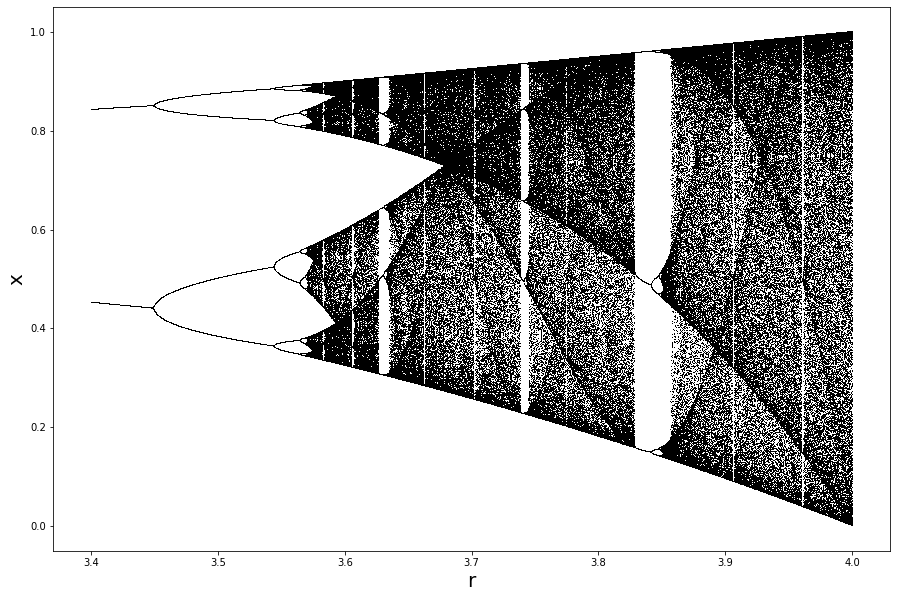

In [21]:
iterations = 1000 # number of iterations, last 10% are plotted
rr = np.linspace(3.4, 4, 5000) # r values for which orbits are determined (0...4, 2.8....4, or 3.4 ...4)
x = 0.4*np.ones(5000)

plt.figure(figsize=(15,10))
for i in range(iterations):
    x = log_map(x, rr)
    
    if i >= (0.9* iterations):
        plt.plot(rr, x, ',k')

plt.xlabel("r", fontsize=20)
plt.ylabel("x", fontsize=20);
#plt.axes().set_aspect(0.2)



## critical r value for bifurcations

plot the critical values  of r in the bifurcation cascade with their period

In [ ]:
r_c = np.array([3, 3.449, 3.54409, 3.5644, 3.568759])
period=np.array([2,4,8,16,32])

plt.figure(figsize=(10,6))
plt.plot(r_c, period, 'k') 
plt.plot(r_c, period, 'om') 
plt.plot([3.569946,3.569946],[0,35], 'b') # line at r_infinity
plt.xlabel("$r_c$", fontsize=20)
plt.ylabel("period", fontsize=20);

## Lyapunov exponent

calculate the Lypunov exponent as a sum over $ln |(f'(x_n))|$

In [ ]:
iterations = 1000 # number of iterations, last 10% are plotted
rr = np.linspace(3.4, 4.0, 5000) # r values for which orbits are determined (0...4, 2.8....4, or 3.4 ...4)
x = 0.2*np.ones(5000)
lyapunov =np.zeros(5000)

plt.figure(figsize=(15,10))
# calculate Lyapunov exponenets iteratively
for i in range(iterations):
    x = log_map(x, rr)
    lyapunov += np.log(abs(rr - 2 * rr * x))/iterations

plt.plot([3.4,4],[0,0], 'k') # line for zero level
plt.plot(rr[lyapunov > 0], lyapunov[lyapunov > 0], '.m') # positive Lyapunov exponents
plt.plot(rr[lyapunov <= 0], lyapunov[lyapunov <= 0], '.c') # negative Lyapunov exponents

plt.xlabel("r", fontsize=20)
plt.ylabel("Lyapunov exponent", fontsize=20);